<a href="https://colab.research.google.com/github/kushagra-93/Deep-Learning-Projects/blob/main/1_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast cancer classification with a simple Neural Network(NN)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('/content/breastcancerdata.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Only Diagnosis is a Categorical Feature and rest are Continous

In [7]:
df.drop(columns= 'Unnamed: 32',axis=1,inplace=True)

In [8]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [10]:
df.shape

(569, 32)

In [22]:
df.drop(columns='id',axis=1,inplace=True)

In [23]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<ipython-input-24-d4792014f095>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


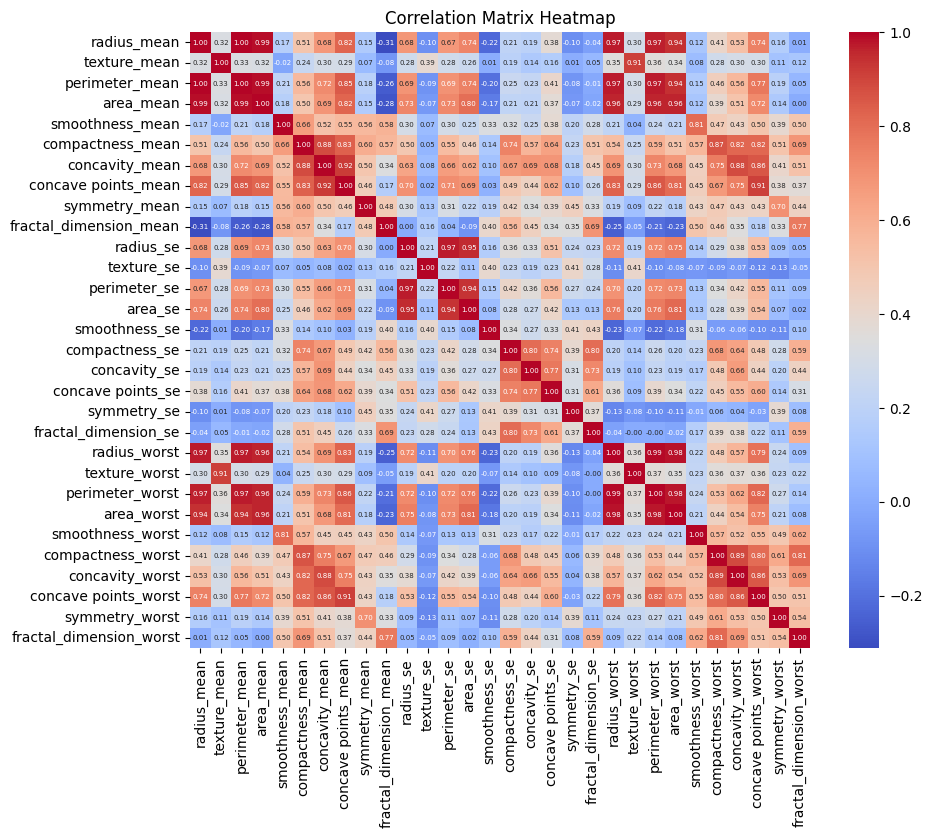

In [24]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 5})
plt.title('Correlation Matrix Heatmap')
plt.show()


1. perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst are highly correlated with radius_mean.
2. texture_worst with texture_mean
3. concave points_mean with concavity_mean
4. perimeter_se , area_se with radius_se

In [27]:
column_drop = ['perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','texture_worst','concave points_mean','perimeter_se','area_se']
df.drop(columns = column_drop, axis=1, inplace=True)

In [28]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
df.shape

(569, 22)

In [26]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [31]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['diagnosis'])

df['target'] = labels


In [33]:
df.drop(columns='diagnosis',axis=1,inplace=True)

In [37]:
df['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [39]:
df.groupby('target').mean()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,0.092478,0.080085,0.046058,0.174186,0.062867,0.284082,1.220380,0.007196,...,0.025997,0.009858,0.020584,0.003636,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,0.102898,0.145188,0.160775,0.192909,0.062680,0.609083,1.210915,0.006780,...,0.041824,0.015060,0.020472,0.004062,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


 The mean values are higher for Malignant case than Benign ones

In [34]:
df.head(5)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [36]:
df.tail(5)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.256,0.010300,...,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.463,0.005769,...,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.075,0.005903,...,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.595,0.006522,...,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,7.76,24.54,0.05263,0.04362,0.00000,0.1587,0.05884,0.3857,1.428,0.007189,...,0.00000,0.02676,0.002783,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


## Model Training

Separating features and targets

In [40]:
X = df.drop(columns='target',axis=1)
y = df['target']

In [41]:
print(X)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0           0.30010         0.2419                 0.07871     1.0950   
1           0.08690      

In [42]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64


Splitting data between train and test

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [46]:
print(X.shape,X_train.shape, X_test.shape)

(569, 21) (455, 21) (114, 21)


Scaling the features

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Building the Neural Network

In [51]:
import tensorflow
tensorflow.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [52]:
# setting up the layers of Neural Network

model = Sequential()

model.add(Flatten(input_shape=(21,)))
model.add(Dense(20,activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 21)                0         
                                                                 
 dense (Dense)               (None, 20)                440       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 482 (1.88 KB)
Trainable params: 482 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# training the Meural Network

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 21ms/step - loss: 1.0959 - accuracy: 0.3741 - val_loss: 0.8884 - val_accuracy: 0.3478
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 0.8534 - accuracy: 0.4254 - val_loss: 0.6661 - val_accuracy: 0.5652
Epoch 3/30
13/13 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.5648 - val_loss: 0.5241 - val_accuracy: 0.6957
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.6895 - val_loss: 0.4351 - val_accuracy: 0.7826
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7653 - val_loss: 0.3802 - val_accuracy: 0.8261
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 0.4151 - accuracy: 0.8093 - val_loss: 0.3417 - val_accuracy: 0.8478
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 0.3677 - accuracy: 0.8435 - val_loss: 0.3144 - val_accuracy: 0.8478
Epoch 8/30
13/13 [=

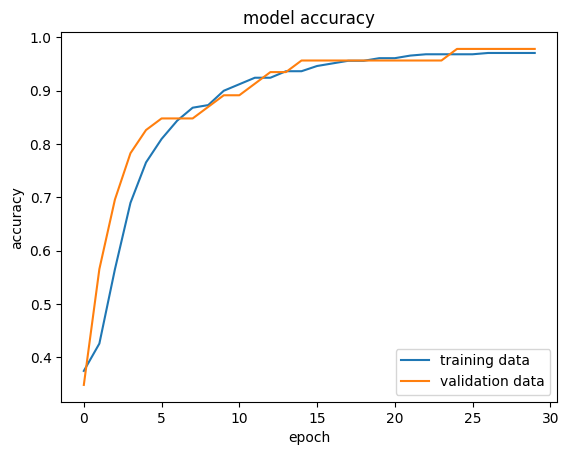

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

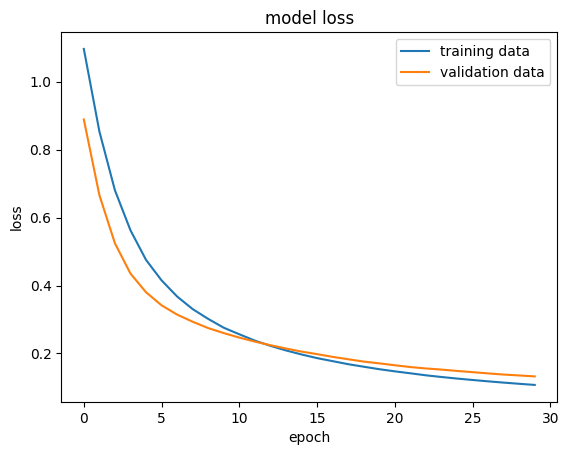

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

## Model Evaluation

In [58]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1028 - accuracy: 0.9825
0.9824561476707458


In [59]:
print(X_test_scaled.shape)
print(X_test_scaled[0])

(114, 21)
[-0.08700339 -1.47192915  2.05627941 -0.18759821  0.04345969  0.48693221
  0.20971492  0.41483725  2.38110688  0.95128447  0.31678369  0.28189043
  2.21465008 -0.39276605  0.44485916  0.23041821 -0.75521902 -0.60192371
 -0.26629174 -1.09776353 -0.65597459]


In [60]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 5ms/step


In [61]:
print(y_pred.shape)
print(y_pred[0])    #probabilty of getting 0 and 1 respectively

(114, 2)
[0.69048    0.49284998]


In [62]:
print(X_test_scaled)

[[-0.08700339 -1.47192915  2.05627941 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342 -0.58742577 ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.10358495 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  1.0936918  ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985  -0.28803829 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  1.2452804  ...  2.03773974  0.27299646
   0.34822356]]


In [63]:
print(y_pred)

[[0.69048    0.49284998]
 [0.63056594 0.42831635]
 [0.9061918  0.09793568]
 [0.00942027 0.9999365 ]
 [0.52099276 0.36434394]
 [0.10969485 0.9879219 ]
 [0.69467425 0.26917255]
 [0.93778455 0.04734191]
 [0.83717203 0.14114031]
 [0.9130778  0.06143086]
 [0.66956466 0.56134313]
 [0.7275961  0.4455212 ]
 [0.7659005  0.26672718]
 [0.75517786 0.2997542 ]
 [0.807634   0.08852841]
 [0.15709458 0.9264428 ]
 [0.90874475 0.12789454]
 [0.91792196 0.1922988 ]
 [0.7774613  0.08209188]
 [0.13407382 0.9770374 ]
 [0.941794   0.3653221 ]
 [0.92747664 0.11166405]
 [0.92485595 0.17459467]
 [0.91319543 0.05275265]
 [0.72803897 0.1046405 ]
 [0.20091005 0.9628691 ]
 [0.82932407 0.2095007 ]
 [0.7646175  0.18727964]
 [0.26842174 0.8930783 ]
 [0.21165222 0.9739669 ]
 [0.86876935 0.15872513]
 [0.7719656  0.19083121]
 [0.84592533 0.104665  ]
 [0.05156015 0.9987293 ]
 [0.10088771 0.9942855 ]
 [0.8358769  0.3215479 ]
 [0.9828447  0.07297084]
 [0.8606156  0.2570021 ]
 [0.9342887  0.13872164]
 [0.81053036 0.3144499 ]


Changing prediction probabilities to class labels

In [64]:
y_pred_labels = [np.argmax(i) for i in y_pred]    #giving the index of max value of the two
print(y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [66]:
#  argmax function

my_list = [0.15, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.15, 0.56]
1


In [69]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,0.01168,0.007445,0.02406,0.001769,12.98,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_scaled = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_scaled)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 37ms/step
[[0. 1.]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
